<a href="https://colab.research.google.com/github/EmilianoLS/DiTellaML/blob/main/Visualizacion%20de%20datos/Clase_I_Pr%C3%A1ctica_Data_Viz_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase I Práctica Data Viz - Parte I
# Gis - Geopandas - Bokeh

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd

### Geopandas Geodataframes

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

Ver documentación oficial: https://geopandas.org/

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs(epsg=3857)
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')).to_crs(epsg=3857)

Cuidado con los epsg!!!
Ver https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1812498.413, 200..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105758.362, 3792946.708..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3205725.605, -964597.245..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."


In [ ]:
cities.head()

,name,geometry
0,Vatican City,POINT (1386304.649 5146502.576)
1,San Marino,POINT (1385011.519 5455558.186)
2,Vaduz,POINT (1059390.800 5963928.576)
3,Luxembourg,POINT (682388.791 6379291.915)
4,Palikir,POINT (17605174.611 771834.179)


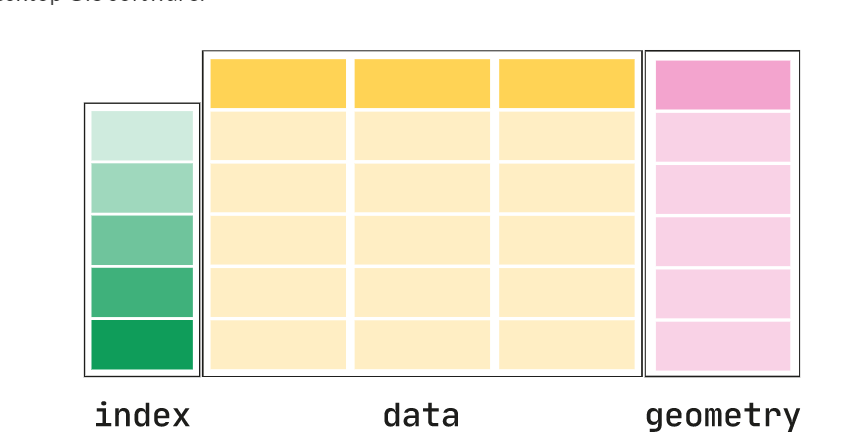

#### Un elemento clave, el objeto geometría!!!

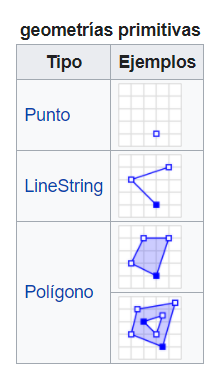

Assuming we have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), we can easily read it using geopandas.read_file function, which automatically detects filetype and creates a GeoDataFrame. 

### Geopandas permite hacer todo tipo de operaciones. Solo vamos a mencionar algunas!

In [ ]:
###Area
world.set_index('name').area

name
Fiji                        2.128334e+10
Tanzania                    9.522552e+11
W. Sahara                   1.171023e+11
Canada                      5.216648e+13
United States of America    2.186228e+13
                                ...     
Serbia                      1.488818e+11
Montenegro                  2.497975e+10
Kosovo                      2.072802e+10
Trinidad and Tobago         8.051555e+09
S. Sudan                    6.399394e+11
Length: 177, dtype: float64

In [ ]:
###Centroide
world.set_index('name').centroid

name
Fiji                         POINT (18248781.791 -1958098.338)
Tanzania                       POINT (3869295.824 -700307.061)
W. Sahara                     POINT (-1348402.527 2794163.183)
Canada                      POINT (-10797792.505 10444215.145)
United States of America     POINT (-13297133.706 6667415.522)
                                           ...                
Serbia                         POINT (2316658.052 5505001.326)
Montenegro                     POINT (2146954.092 5280331.697)
Kosovo                         POINT (2326059.071 5248462.866)
Trinidad and Tobago           POINT (-6827259.300 1167359.200)
S. Sudan                        POINT (3361520.852 815325.676)
Length: 177, dtype: geometry

In [ ]:
###Distancias entre centroides
centroides = world.set_index('name').centroid
centroides.Fiji.distance(centroides.Kosovo)/1000

17477.632082391556

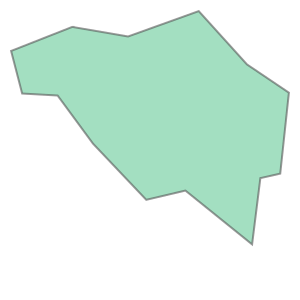

In [ ]:
###Veo si una ciudad esta en un pais
belgica = world.loc[world['name'] == 'Belgium', 'geometry'].squeeze() ###Me quedo con el polígono del país
belgica

In [ ]:
###Elijo dos ciudades para jugar... Noten que la geometria es de puntos, no polígonos
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
bruselas = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

In [ ]:
###Es una geometría que está contenida en un objeto de tipo Shapely
type(bruselas)

shapely.geometry.point.Point

In [ ]:
###Hay muchos métodos que podemos aplicar...
dir(bruselas)

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'ha

In [ ]:
###Bruselas esta en Bélgica?
bruselas.within(belgica)

True

In [ ]:
### Y Paris?
paris.within(belgica)

False

In [ ]:
### Bélgica contiene a Bruselas?
belgica.contains(bruselas)

True

Para profundizar en estos temas recomendamos ver las notebooks:

 

*   Introducción a data geoespacial: https://drive.google.com/file/d/19bFyA9YkhZkPfCCHlpP19_O7iK6pOz2J/view?usp=sharing
*   Operaciones de relaciones espaciales: https://drive.google.com/file/d/1oDk0b6vOcXv-UGG9T7YNiTFt5MmM0Grw/view?usp=sharing

*   Joins espaciales: https://drive.google.com/file/d/1fb12OL__IorI-Fhj2u2sNHhQfjQOmlr0/view?usp=sharing














 
 

### Ahora a graficar!!!

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
covid=pd.read_csv('https://d2evnhp9uuelf8.cloudfront.net/full_data.csv')
covid.date=pd.to_datetime(covid.date)
covid.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [ ]:
###Voy a mergear el dataset de países (World), con la cantidad de casos activos correspondientes al último reporte para cada país.
world=world.replace('United States of America', 'United States')
ultimo_reporte=covid.sort_values(by=['location', 'date'], ascending=False).groupby('location').first()
world=pd.merge(world, ultimo_reporte.total_cases,  how='left', left_on='name', right_on='location')

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total_cases
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",18.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",254.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",38413.0
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",825041.0


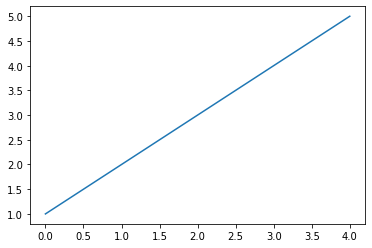

In [ ]:
###Recordemos algo básico de la sintaxis de MatPlotLib
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5])

In [ ]:
ax

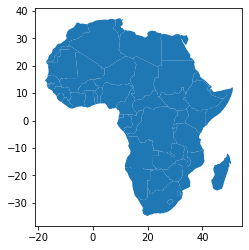

In [ ]:
###Recordemos lo básico de ploteos con Geopandas
africa=world[world['continent'] == 'Africa']

fig, lio =plt.subplots()
africa.plot(ax=lio)###Geopandas!!!

[]

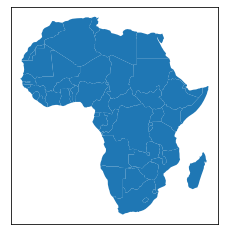

In [ ]:
###Recordemos lo básico de ploteos con Geopandas
africa=world[world['continent'] == 'Africa']

fig, ax =plt.subplots()
africa.plot(ax=ax)
ax.set_xticks([])
ax.set_yticks([])

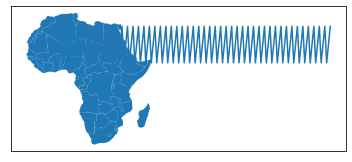

In [ ]:
ax.plot([10,20,30]*50)
fig

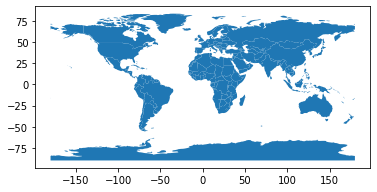

In [ ]:
fig, ax =plt.subplots()
world.plot(ax=ax)

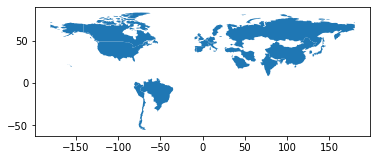

In [ ]:
###Ahora queremos plotear únicamente un mapa con países con más de 10.000 casos activos de Covid
fig, ax =plt.subplots()
world.loc[world.total_cases>10000,:].plot(ax=ax)

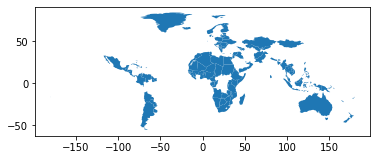

In [ ]:
###Y ahora ploteamos los que tienen menos de 10.000 casos
fig, ax =plt.subplots()
world.loc[world.total_cases<=10000,:].plot(ax=ax)

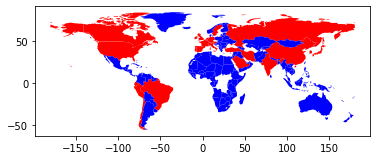

In [ ]:
###Mejor vamos a plotear todo en el mismo gráfico, con colores distintos!
fig, ax =plt.subplots()
world.loc[world.total_cases>10000,:].plot(ax=ax, color='r')
world.loc[world.total_cases<10000,:].plot(ax=ax, color='b')

###El problema es que no podemos controlar las etiquetas de leyenda!!!

In [ ]:
###La solución. Dado que estamos trabajando en este caso con variables categóricas (países con más y menos de 10.000 casos), debemos pasar estas categorías a una columna.
###Luego, le "pedimos" a Geopandas que grafique esta columna
world['Cat_n_casos']=world.total_cases.apply(lambda x: 'Más de 10.000 Casos' if x>10000 else 'Menos (o igual) a 10.000 Casos')###Creamos la columna con variables categóricas

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total_cases,Cat_n_casos
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",18.0,Menos (o igual) a 10.000 Casos
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",254.0,Menos (o igual) a 10.000 Casos
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,Menos (o igual) a 10.000 Casos
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",38413.0,Más de 10.000 Casos
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",825041.0,Más de 10.000 Casos


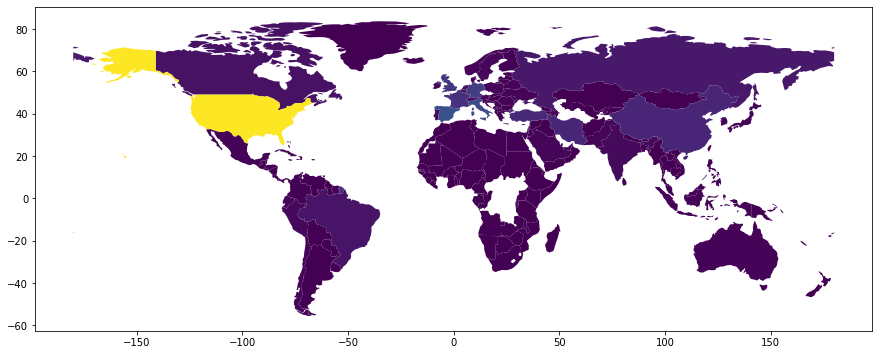

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, column='total_cases', categorical=False, legend=False)

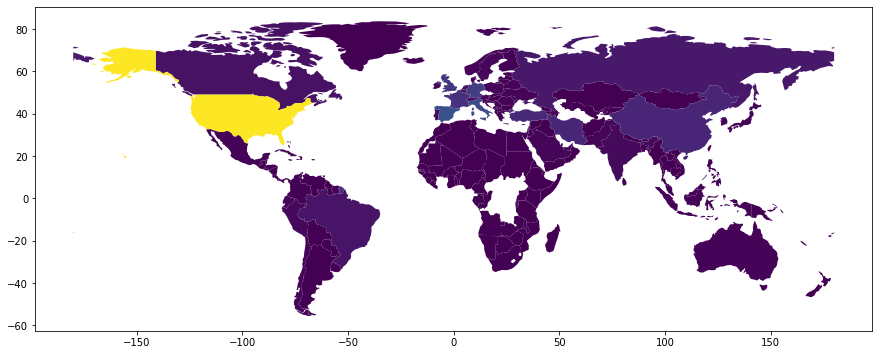

In [ ]:
###Tal vez queremos plotear la cantidad de casos como una función continua, no como una variable categórica.
fig, ax =plt.subplots(figsize=(15, 15))
world.plot(ax=ax, column='total_cases')

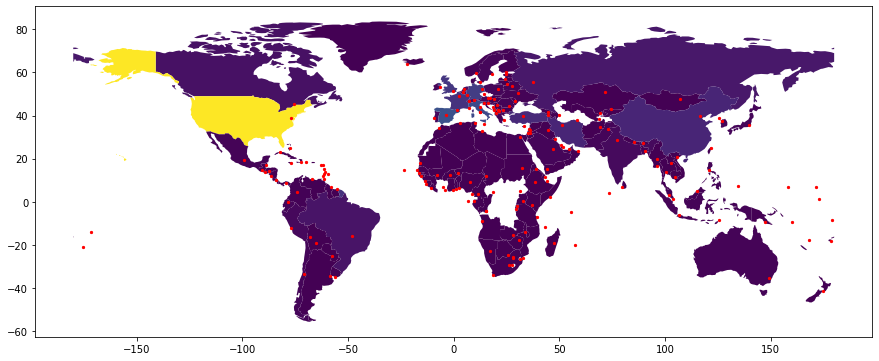

<Figure size 432x288 with 0 Axes>

In [ ]:
###AGREGAMOS CAPITALES
cities.plot(ax=ax, marker='o', color='red', markersize=5)
fig

In [ ]:
covid=pd.read_excel('https://d2evnhp9uuelf8.cloudfront.net/Covid.xlsx')
covid.columns=['Fecha', 'Nuevos', 'Acumulados']
covid

,Fecha,Nuevos,Acumulados
0,2020-03-04,1,1
1,2020-03-06,1,2
2,2020-03-07,6,8
3,2020-03-08,1,9
4,2020-03-09,3,12
5,2020-03-11,7,19
6,2020-03-13,12,31
7,2020-03-14,3,34
8,2020-03-15,11,45
9,2020-03-16,11,56


<BarContainer object of 47 artists>

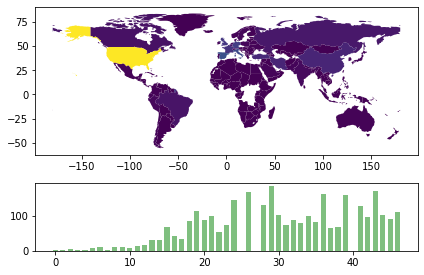

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(3, 1)
ax1 = fig.add_subplot(gs[:2, :])
ax2 = fig.add_subplot(gs[2, :])

world.plot(ax=ax1, column='total_cases')
ax2.bar(covid.index, covid.Nuevos, 0.7, 0, color='green', alpha=0.5)


### Visualización interactiva con Bokeh

In [ ]:
import json
from bokeh.io import show
from bokeh.models import (ColorBar,                      
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper)
from bokeh.palettes import brewer
from bokeh.plotting import figure
from bokeh.io import output_notebook

In [ ]:
import urllib.request
import os

def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [ ]:
download_url('https://d2evnhp9uuelf8.cloudfront.net/ne_110m_admin_0_countries.zip','ne_110m_admin_0_countries.zip')

In [ ]:
shapefile = 'ne_110m_admin_0_countries.zip'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [ ]:
datafile = 'https://d2evnhp9uuelf8.cloudfront.net/share-of-deaths-obesity.csv'
#Read csv file using pandas
df = pd.read_csv(datafile, names = ['entity', 'code', 'year', 'per_cent_obesity'], skiprows = 1)
df.head()

,entity,code,year,per_cent_obesity
0,Afghanistan,AFG,1990,3.92
1,Afghanistan,AFG,1991,3.87
2,Afghanistan,AFG,1992,3.82
3,Afghanistan,AFG,1993,3.50
4,Afghanistan,AFG,1994,3.25


In [ ]:
#Filter data for year 2016.
df_2016 = df[df['year'] == 2016]
#Merge dataframes gdf and df_2016.
merged = gdf.merge(df_2016, left_on = 'country_code', right_on = 'code')

In [ ]:
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [ ]:
 #Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('% obesity', '@per_cent_obesity')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'below')
    
#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(p)